In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats, integrate
from Bio import SeqIO
from PIL import Image

In [2]:
# 设置绘图风格
sns.set_style("ticks", rc={"xtick.direction": "in", "ytick.direction": "in", "ytick.major.pad": 1})
# 处理中文乱码
plt.rcParams['font.sans-serif'] = ['Arial']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'text.usetex': False})

# 设置百分比格式
def to_percent(y, position):
    return '{:.0f}%'.format(y)

In [4]:
utr100_uorf = pd.read_csv('UTR_data/filtered_utr100_mrl_uorf.csv')
print("utr number is: ", len(utr100_uorf))
utr100_uorf.head()
# 对 utr100 列去重
utr100_uorf_dep = utr100_uorf.drop_duplicates(subset=['utr100'])
print("utr number is: ", len(utr100_uorf_dep))

utr number is:  53143
utr number is:  53143


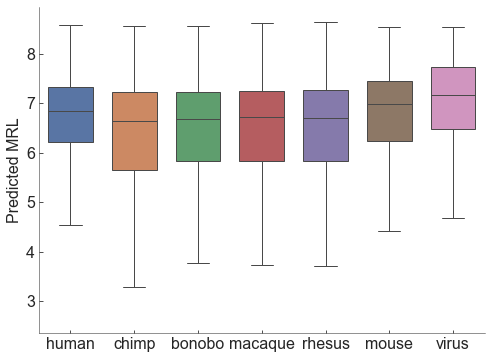

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the x-axis order
x_order = ['human', 'chimp', 'bonobo', 'macaque', 'rhesus', 'mouse', 'virus']

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='spe', y='pred_frame_pool_100', data=utr100_uorf, order=x_order, palette='deep', width=0.7, linewidth=1, fliersize=0)
# 去掉x轴名称
plt.xlabel('', fontsize=16)
# 设置y轴标签，使用LaTeX语法将10设置为下标
plt.ylabel('Predicted MRL', fontsize=16)

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# # Save the plot as a high-quality image for scientific publications
# plt.savefig('result_2/boxplot_spe_mrl.pdf', dpi=300, bbox_inches='tight')  # Save as PDF for vector graphics

# # Save the plot as an SVG file for high-quality vector graphics
# plt.savefig('result_2/boxplot_spe_mrl.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_2/boxplot_spe_mrl.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_2/boxplot_spe_mrl.png')
png_image.save('result_2/boxplot_spe_mrl.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()


In [8]:
utr100_uorf_hm = pd.read_csv("UTR_data/filtered_utr100_mrl_uorf_hm.csv")
print("utr number is: ", len(utr100_uorf_hm))
utr100_uorf_hm.head()

utr number is:  18628


,id,spe,len,utr50,utr100,utr200,pred_optimus_50,pred_frame_pool_50,pred_optimus_100,pred_frame_pool_100,...,GC.,seq_fold_energy,kmer_3,utr5_uORF,utr5_IRE,utr5_TOP,utr5_UNR,uORF_status,uAUG,kozak
0,mm39_ncbiRefSeqCurated_NM_001159711.1,mouse,52,cgagtccgatggtcttcctggcgagtttaaagtatcggagatatta...,gtcgagtccgatggtcttcctggcgagtttaaagtatcggagatat...,gtcgagtccgatggtcttcctggcgagtttaaagtatcggagatat...,5.932981,6.238605,6.598626,6.459149,...,0.442308,-0.51,"[(GTC, 0.06), (CGA, 0.06), (GAG, 0.06), (AGT, ...",0.0,0.0,0.0,0.0,no exist,1,True
1,mm39_ncbiRefSeqCurated_NM_001347056.1,mouse,32,gagcccctggcctagcaagactgccttgtacc,gagcccctggcctagcaagactgccttgtacc,gagcccctggcctagcaagactgccttgtacc,6.992350,7.110490,6.953137,7.110490,...,0.625000,-0.31,"[(GCC, 0.1), (CCT, 0.1), (AGC, 0.0666666666666...",0.0,0.0,0.0,0.0,no exist,0,True
2,mm39_ncbiRefSeqCurated_NM_133684.4,mouse,91,cgcctcgacaccgcggcccagtagcccaggcctgcccgggatagtg...,gccaaccctggctcctcccacactcccggagccttaagccccgcct...,gccaaccctggctcctcccacactcccggagccttaagccccgcct...,5.982927,7.006216,6.438869,6.796448,...,0.692308,-8.33,"[(GCC, 0.0898876404494382), (CCC, 0.0898876404...",0.0,0.0,0.0,0.0,no exist,0,True
3,mm39_ncbiRefSeqCurated_NM_001310540.1,mouse,95,gcgctgcctggcagtttgcctcttcctcgtctgtcctccagcttgc...,acctccgtcccgcggtagccgggtgtcctcgcgccgctcgtccgcg...,acctccgtcccgcggtagccgggtgtcctcgcgccgctcgtccgcg...,6.985615,7.367161,7.378522,7.297720,...,0.705263,-8.15,"[(TCC, 0.0860215053763441), (CGC, 0.0752688172...",0.0,0.0,0.0,0.0,no exist,0,False
4,mm39_ncbiRefSeqCurated_NM_001252070.1,mouse,92,ttccgcagcagcgatcccggccggcgttgcctggcccgcaagtcga...,gagctgtccagcggcgaacaactctcctctccaggtcctgagttcc...,gagctgtccagcggcgaacaactctcctctccaggtcctgagttcc...,6.055372,6.972933,7.035959,7.510929,...,0.684783,-7.51,"[(TCC, 0.06666666666666667), (AGC, 0.044444444...",0.0,0.0,0.0,0.0,no exist,0,True


In [9]:
# 定义GC%和MRL的分组区间
utr100_uorf_hm['GC_precent'] = utr100_uorf_hm['GC.'] * 100

gc_bins = np.arange(utr100_uorf_hm['GC.'].min(), utr100_uorf_hm['GC.'].max() + 1, 5)  # 每5个单位一个区间
mrl_bins = np.arange(utr100_uorf_hm['pred_frame_pool_100'].min(), utr100_uorf_hm['pred_frame_pool_100'].max() + 1, 10)  # 每10个单位一个区间
# 将数据进行分组
utr100_uorf_hm['GC_group'] = pd.cut(utr100_uorf_hm['GC.'], bins=gc_bins)
utr100_uorf_hm['MRL_group'] = pd.cut(utr100_uorf_hm['pred_frame_pool_100'], bins=mrl_bins)

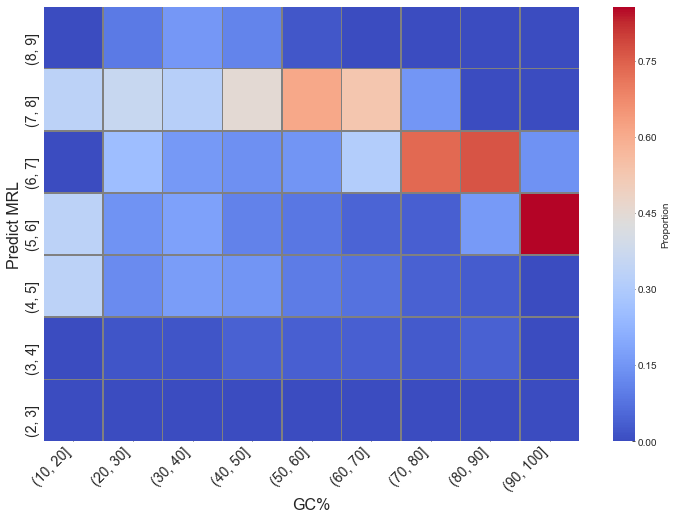

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 假设utr100_uorf_hm已经是一个pandas DataFrame
utr100_uorf_hm['GC_percent'] = utr100_uorf_hm['GC.'] * 100

# 定义GC%和MRL的分组区间
gc_bins = np.arange(0, 110, 10)  # GC%分为10个单位的区间
mrl_bins = np.arange(2, 10)

# 将数据进行分组
utr100_uorf_hm['GC_group'] = pd.cut(utr100_uorf_hm['GC_percent'], bins=gc_bins).astype(str)
utr100_uorf_hm['MRL_group'] = pd.cut(utr100_uorf_hm['pred_frame_pool_100'], bins=mrl_bins).astype(str)

# 检查分组后的数据
# print(utr100_uorf_hm[['GC_group', 'MRL_group']].dropna())

# 创建一个透视表，计算每个分组的计数
heatmap_data = utr100_uorf_hm.pivot_table(index='MRL_group', columns='GC_group', aggfunc='size', fill_value=0)

# 按列总和进行归一化处理
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# 检查归一化后的透视表
# print(heatmap_data)

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Proportion'}, linewidths=.5, linecolor='gray')

# 设置图表标题和标签
plt.xlabel('GC%', fontsize=16)
plt.ylabel('Predict MRL', fontsize=16)

# 设置坐标轴标签的字体大小
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# 反转y轴，使其从下到上升序
plt.gca().invert_yaxis()

# 设置坐标轴线条宽度
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# 隐藏顶部和右侧的坐标轴线条
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# # 保存图形为高质量的PDF文件，用于科学出版物
# plt.savefig('result_2/heatmap_gc_mrl.pdf', dpi=300, bbox_inches='tight')

# # 保存图形为SVG文件，用于高质量矢量图形
# plt.savefig('result_2/heatmap_gc_mrl.svg', bbox_inches='tight')

# # 保存图形为PNG文件，用于高质量矢量图形
# plt.savefig('result_2/heatmap_gc_mrl.png', dpi=300, bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_2/heatmap_gc_mrl.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_2/heatmap_gc_mrl.png')
png_image.save('result_2/heatmap_gc_mrl.tiff', dpi=(600, 600), compression='tiff_lzw')

# 显示图形
plt.show()


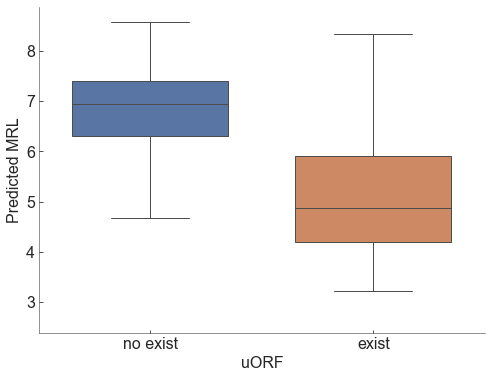

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 新建一列uORF_status
utr100_uorf_hm['uORF_status'] = utr100_uorf_hm['utr5_uORF'].apply(lambda x: 'exist' if x > 0 else 'no exist')

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='uORF_status', y='pred_frame_pool_100', data=utr100_uorf_hm, palette='deep', width=0.7, linewidth=1, fliersize=0)
# 去掉x轴名称
plt.xlabel('uORF', fontsize=16)
# 设置y轴标签，使用LaTeX语法将10设置为下标
plt.ylabel('Predicted MRL', fontsize=16)

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# # # Save the plot as a high-quality image for scientific publications
# plt.savefig('result_2/boxplot_uorf_mrl.pdf', dpi=300, bbox_inches='tight')  # Save as PDF for vector graphics

# # # Save the plot as an SVG file for high-quality vector graphics
# plt.savefig('result_2/boxplot_uorf_mrl.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_2/boxplot_uorf_mrl.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_2/boxplot_uorf_mrl.png')
png_image.save('result_2/boxplot_uorf_mrl.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()


In [12]:
# 定义一个函数来统计字符串中'uAUG'出现的次数  
def count_uAUG(seq_str):  
    return seq_str.count('atg')
utr100_uorf_hm['uAUG'] = utr100_uorf_hm['utr100'].apply(count_uAUG)
utr100_uorf_hm.head()


,id,spe,len,utr50,utr100,utr200,pred_optimus_50,pred_frame_pool_50,pred_optimus_100,pred_frame_pool_100,...,utr5_IRE,utr5_TOP,utr5_UNR,uORF_status,uAUG,kozak,GC_precent,GC_group,MRL_group,GC_percent
0,mm39_ncbiRefSeqCurated_NM_001159711.1,mouse,52,cgagtccgatggtcttcctggcgagtttaaagtatcggagatatta...,gtcgagtccgatggtcttcctggcgagtttaaagtatcggagatat...,gtcgagtccgatggtcttcctggcgagtttaaagtatcggagatat...,5.932981,6.238605,6.598626,6.459149,...,0.0,0.0,0.0,no exist,1,True,44.230769,"(40, 50]","(6, 7]",44.230769
1,mm39_ncbiRefSeqCurated_NM_001347056.1,mouse,32,gagcccctggcctagcaagactgccttgtacc,gagcccctggcctagcaagactgccttgtacc,gagcccctggcctagcaagactgccttgtacc,6.992350,7.110490,6.953137,7.110490,...,0.0,0.0,0.0,no exist,0,True,62.500000,"(60, 70]","(7, 8]",62.500000
2,mm39_ncbiRefSeqCurated_NM_133684.4,mouse,91,cgcctcgacaccgcggcccagtagcccaggcctgcccgggatagtg...,gccaaccctggctcctcccacactcccggagccttaagccccgcct...,gccaaccctggctcctcccacactcccggagccttaagccccgcct...,5.982927,7.006216,6.438869,6.796448,...,0.0,0.0,0.0,no exist,0,True,69.230769,"(60, 70]","(6, 7]",69.230769
3,mm39_ncbiRefSeqCurated_NM_001310540.1,mouse,95,gcgctgcctggcagtttgcctcttcctcgtctgtcctccagcttgc...,acctccgtcccgcggtagccgggtgtcctcgcgccgctcgtccgcg...,acctccgtcccgcggtagccgggtgtcctcgcgccgctcgtccgcg...,6.985615,7.367161,7.378522,7.297720,...,0.0,0.0,0.0,no exist,0,False,70.526316,"(70, 80]","(7, 8]",70.526316
4,mm39_ncbiRefSeqCurated_NM_001252070.1,mouse,92,ttccgcagcagcgatcccggccggcgttgcctggcccgcaagtcga...,gagctgtccagcggcgaacaactctcctctccaggtcctgagttcc...,gagctgtccagcggcgaacaactctcctctccaggtcctgagttcc...,6.055372,6.972933,7.035959,7.510929,...,0.0,0.0,0.0,no exist,0,True,68.478261,"(60, 70]","(7, 8]",68.478261


In [13]:
utr100_uorf_hm.columns

Index(['id', 'spe', 'len', 'utr50', 'utr100', 'utr200', 'pred_optimus_50',
       'pred_frame_pool_50', 'pred_optimus_100', 'pred_frame_pool_100',
       'pred_frame_pool_200', 'uORF', 'seq_len', 'GC.', 'seq_fold_energy',
       'kmer_3', 'utr5_uORF', 'utr5_IRE', 'utr5_TOP', 'utr5_UNR',
       'uORF_status', 'uAUG', 'kozak', 'GC_precent', 'GC_group', 'MRL_group',
       'GC_percent'],
      dtype='object')

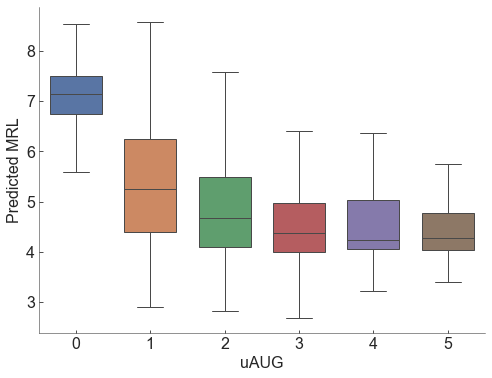

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='uAUG', y='pred_frame_pool_100', data=utr100_uorf_hm.loc[utr100_uorf_hm['uAUG'] <= 5], palette='deep', width=0.7, linewidth=1, fliersize=0)
# 去掉x轴名称
plt.xlabel('uAUG', fontsize=16)
# 设置y轴标签，使用LaTeX语法将10设置为下标
plt.ylabel('Predicted MRL', fontsize=16)

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置x轴和y轴标签的字体大小
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# # # Save the plot as a high-quality image for scientific publications
# plt.savefig('result_2/boxplot_uaug_mrl.pdf', dpi=300, bbox_inches='tight')  # Save as PDF for vector graphics

# # # Save the plot as an SVG file for high-quality vector graphics
# plt.savefig('result_2/boxplot_uaug_mrl.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_2/boxplot_uaug_mrl.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_2/boxplot_uaug_mrl.png')
png_image.save('result_2/boxplot_uaug_mrl.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()


In [15]:
# 定义一个函数来检查字符串的倒数第三位是否为'A'或'G'  
def check_kozak(seq_str):  
    # 确保字符串长度至少为3  
    if len(seq_str) >= 3:  
        # 使用切片获取倒数第三位字符  
        third_last_char = seq_str[-3]  
        # 检查字符是否为'A'或'G'  
        return third_last_char in ['a', 'g']  
    else:  
        # 如果字符串长度小于3，返回False  
        return False
    
utr100_uorf_hm['kozak'] = utr100_uorf_hm['utr100'].apply(check_kozak)
utr100_uorf_hm.head()


,id,spe,len,utr50,utr100,utr200,pred_optimus_50,pred_frame_pool_50,pred_optimus_100,pred_frame_pool_100,...,utr5_IRE,utr5_TOP,utr5_UNR,uORF_status,uAUG,kozak,GC_precent,GC_group,MRL_group,GC_percent
0,mm39_ncbiRefSeqCurated_NM_001159711.1,mouse,52,cgagtccgatggtcttcctggcgagtttaaagtatcggagatatta...,gtcgagtccgatggtcttcctggcgagtttaaagtatcggagatat...,gtcgagtccgatggtcttcctggcgagtttaaagtatcggagatat...,5.932981,6.238605,6.598626,6.459149,...,0.0,0.0,0.0,no exist,1,True,44.230769,"(40, 50]","(6, 7]",44.230769
1,mm39_ncbiRefSeqCurated_NM_001347056.1,mouse,32,gagcccctggcctagcaagactgccttgtacc,gagcccctggcctagcaagactgccttgtacc,gagcccctggcctagcaagactgccttgtacc,6.992350,7.110490,6.953137,7.110490,...,0.0,0.0,0.0,no exist,0,True,62.500000,"(60, 70]","(7, 8]",62.500000
2,mm39_ncbiRefSeqCurated_NM_133684.4,mouse,91,cgcctcgacaccgcggcccagtagcccaggcctgcccgggatagtg...,gccaaccctggctcctcccacactcccggagccttaagccccgcct...,gccaaccctggctcctcccacactcccggagccttaagccccgcct...,5.982927,7.006216,6.438869,6.796448,...,0.0,0.0,0.0,no exist,0,True,69.230769,"(60, 70]","(6, 7]",69.230769
3,mm39_ncbiRefSeqCurated_NM_001310540.1,mouse,95,gcgctgcctggcagtttgcctcttcctcgtctgtcctccagcttgc...,acctccgtcccgcggtagccgggtgtcctcgcgccgctcgtccgcg...,acctccgtcccgcggtagccgggtgtcctcgcgccgctcgtccgcg...,6.985615,7.367161,7.378522,7.297720,...,0.0,0.0,0.0,no exist,0,False,70.526316,"(70, 80]","(7, 8]",70.526316
4,mm39_ncbiRefSeqCurated_NM_001252070.1,mouse,92,ttccgcagcagcgatcccggccggcgttgcctggcccgcaagtcga...,gagctgtccagcggcgaacaactctcctctccaggtcctgagttcc...,gagctgtccagcggcgaacaactctcctctccaggtcctgagttcc...,6.055372,6.972933,7.035959,7.510929,...,0.0,0.0,0.0,no exist,0,True,68.478261,"(60, 70]","(7, 8]",68.478261


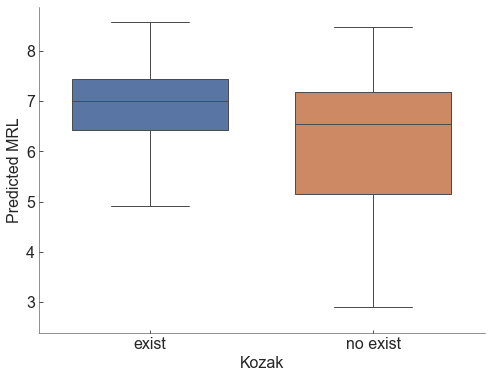

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the x-axis order
x_order = [True, False]

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='kozak', y='pred_frame_pool_100', data=utr100_uorf_hm, order=x_order, palette='deep', width=0.7, linewidth=1, fliersize=0)
# 去掉x轴名称
plt.xlabel('Kozak', fontsize=16)
# 设置y轴标签，使用LaTeX语法将10设置为下标
plt.ylabel('Predicted MRL', fontsize=16)

# Set axis line width
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)

# Hide right and top spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置x轴和y轴标签的字体大小
plt.xticks([0, 1], ['exist', 'no exist'], fontsize=16)
plt.yticks(fontsize=16)

# # # Save the plot as a high-quality image for scientific publications
# plt.savefig('result_2/boxplot_kozak_mrl.pdf', dpi=300, bbox_inches='tight')  # Save as PDF for vector graphics

# # # Save the plot as an SVG file for high-quality vector graphics
# plt.savefig('result_2/boxplot_kozak_mrl.svg', bbox_inches='tight')

# Save the plot as a high-quality PNG image first
plt.savefig('result_2/boxplot_kozak_mrl.png', dpi=600, bbox_inches='tight')

# Then, use Pillow to convert the PNG image to TIFF format
png_image = Image.open('result_2/boxplot_kozak_mrl.png')
png_image.save('result_2/boxplot_kozak_mrl.tiff', dpi=(600, 600), compression='tiff_lzw')

# Show the plot
plt.show()


c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

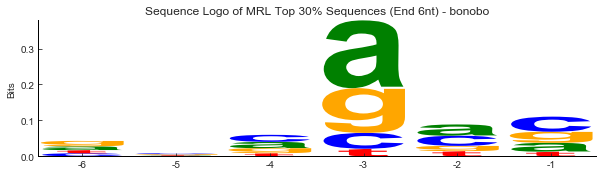

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

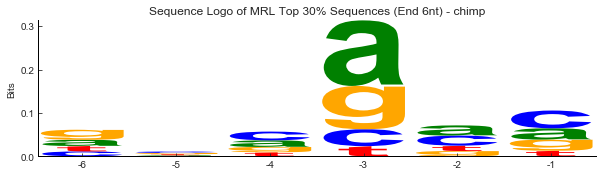

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

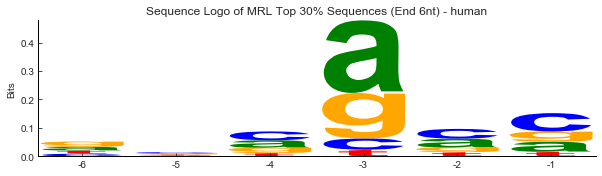

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

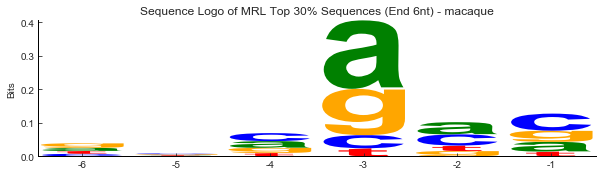

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

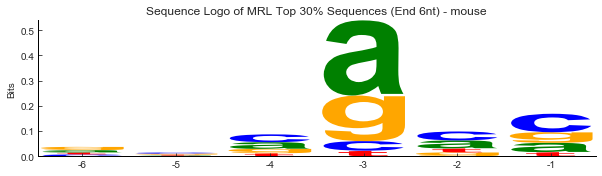

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

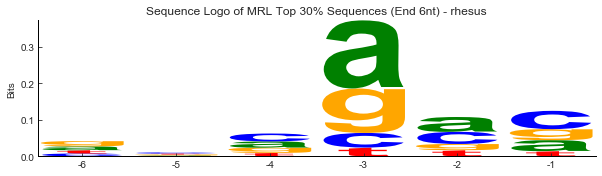

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

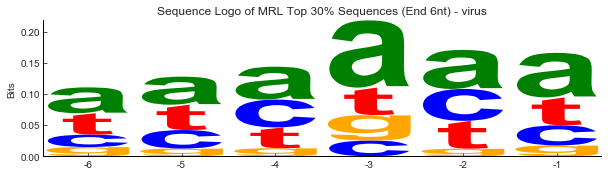

In [17]:
import logomaker

# 按照物种分组
grouped = utr100_uorf.groupby('spe')

# 为每个物种生成序列logo图
for spe, group in grouped:

    # 计算前10%的阈值
    threshold = group['pred_frame_pool_100'].quantile(0.7)
    # 筛选出前10%的序列
    top_10_percent_df = group[(group['pred_frame_pool_100'] >= threshold) & (group['len'] >= 6)]

    # 提取末端10个核苷酸
    top_10_percent_df['end_10nt'] = top_10_percent_df['utr100'].apply(lambda x: x[-6:])
    # 将 'utr100' 列转换为小写
    top_10_percent_df['end_10nt'] = top_10_percent_df['end_10nt'].str.lower()

    sequences = top_10_percent_df['end_10nt'].tolist()
    if sequences:
        # 将提取的末端10nt序列转换为 DataFrame 格式
        seq_df = logomaker.alignment_to_matrix(sequences, to_type='information')

        # 绘制序列logo图
        plt.figure(figsize=(10, 4))
        logo = logomaker.Logo(seq_df, color_scheme="classic")
        logo.style_spines(visible=False)
        logo.style_spines(spines=['left', 'bottom'], visible=True)
        logo.style_xticks(rotation=0, fmt='%d', anchor=0)
        logo.ax.set_xticklabels(list(range(-6, 0)))
        logo.ax.set_ylabel('Bits')
        logo.ax.set_title(f"Sequence Logo of MRL Top 30% Sequences (End 6nt) - {spe}")

        # 保存图像到result_2文件夹
        # plt.savefig(f'result_2/sequence_logo_{spe}.png', dpi=300, bbox_inches='tight')
        # plt.savefig(f'result_2/sequence_logo_{spe}.svg', bbox_inches='tight')

        # Save the plot as a high-quality PNG image first
        plt.savefig(f'result_2/sequence_logo_{spe}.png', dpi=600, bbox_inches='tight')

        # Then, use Pillow to convert the PNG image to TIFF format
        png_image = Image.open(f'result_2/sequence_logo_{spe}.png')
        png_image.save(f'result_2/sequence_logo_{spe}.tiff', dpi=(600, 600), compression='tiff_lzw')

        plt.show()

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

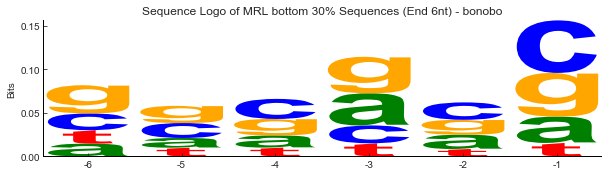

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

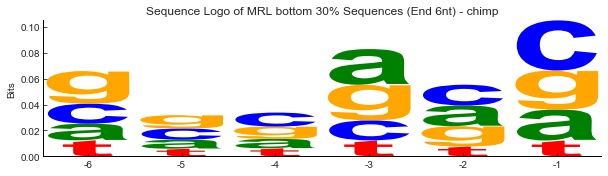

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

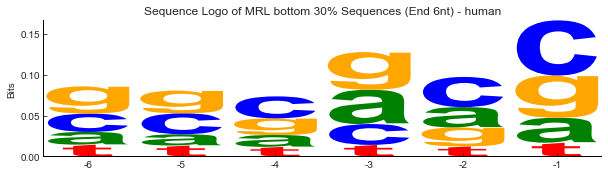

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

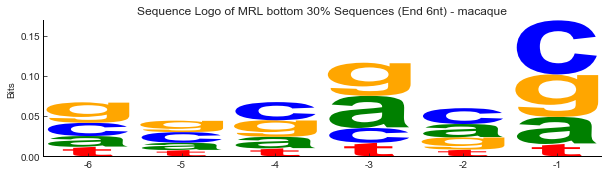

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

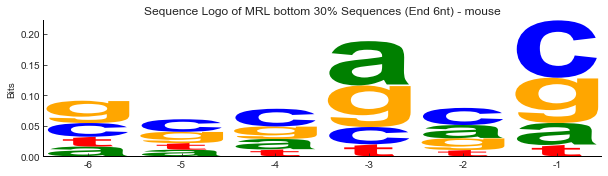

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

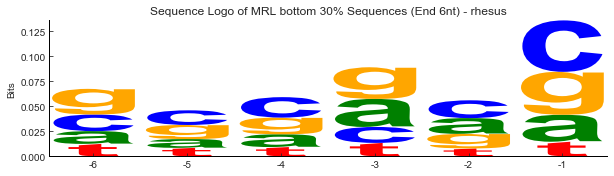

c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\Users\rhegen\anaconda3\envs\5UTR\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 720x288 with 0 Axes>

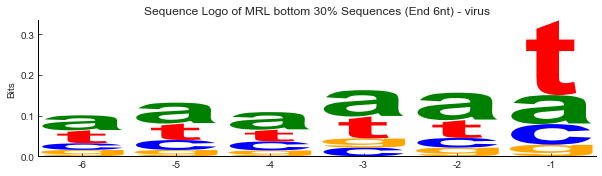

In [18]:
import logomaker

# 按照物种分组
grouped = utr100_uorf.groupby('spe')

# 为每个物种生成序列logo图
for spe, group in grouped:

    # 计算前10%的阈值
    threshold = group['pred_frame_pool_100'].quantile(0.3)
    # 筛选出前10%的序列
    top_10_percent_df = group[(group['pred_frame_pool_100'] <= threshold) & (group['len'] >= 6)]

    # 提取末端10个核苷酸
    top_10_percent_df['end_10nt'] = top_10_percent_df['utr100'].apply(lambda x: x[-6:])
    # 将 'utr100' 列转换为小写
    top_10_percent_df['end_10nt'] = top_10_percent_df['end_10nt'].str.lower()

    sequences = top_10_percent_df['end_10nt'].tolist()
    if sequences:
        # 将提取的末端10nt序列转换为 DataFrame 格式
        seq_df = logomaker.alignment_to_matrix(sequences, to_type='information')

        # 绘制序列logo图
        plt.figure(figsize=(10, 4))
        logo = logomaker.Logo(seq_df, color_scheme="classic")
        logo.style_spines(visible=False)
        logo.style_spines(spines=['left', 'bottom'], visible=True)
        logo.style_xticks(rotation=0, fmt='%d', anchor=0)
        logo.ax.set_xticklabels(list(range(-6, 0)))
        logo.ax.set_ylabel('Bits')
        logo.ax.set_title(f"Sequence Logo of MRL bottom 30% Sequences (End 6nt) - {spe}")

        # # 保存图像到result_2文件夹
        # plt.savefig(f'result_2/sequence_logo_{spe}_bottom.png', dpi=300, bbox_inches='tight')
        # plt.savefig(f'result_2/sequence_logo_{spe}_bottom.svg', bbox_inches='tight')

        # Save the plot as a high-quality PNG image first
        plt.savefig(f'result_2/sequence_logo_{spe}_bottom.png', dpi=600, bbox_inches='tight')

        # Then, use Pillow to convert the PNG image to TIFF format
        png_image = Image.open(f'result_2/sequence_logo_{spe}_bottom.png')
        png_image.save(f'result_2/sequence_logo_{spe}_bottom.tiff', dpi=(600, 600), compression='tiff_lzw')

        plt.show()